<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


# Part 5: SpaceX Launches - Visualization & Feature Engineering

**Short description:**  
This notebook loads `dataset_part_2.csv` (SpaceX launch data), produces exploratory visualizations (payload, flight number, orbit, launch site, yearly success rate) with Seaborn/Matplotlib, and performs basic feature-engineering (one-hot encoding and export of `dataset_part_3.csv`).

**Objectives**
- Load the processed SpaceX dataset and inspect sample rows.
- Visualize relationships between Flight Number, Payload Mass, Orbit, Launch Site and success (`Class`) using Seaborn/Matplotlib.
- Extract year from the Date column and plot success rate over time.
- Create one-hot encoded features for categorical variables to prepare data for modeling.
- Save the feature-engineered table for downstream modeling.

**Notice about documentation:**  
The original notebook submission (course assignment) was kept intact. I have **only modified documentation (comments, headings, markdown)** and made **minimal, necessary corrections** to ensure the notebook runs without errors. All rights related to the lab/workshop design and original exercise belong exclusively to **IBM Corporation**. This notebook includes additional documentation for clarity, but the intellectual property of the original exercise is retained by IBM.

---

## Table of contents

1. Dependencies & execution instructions  
2. Load dataset & preview  
3. Visualizations: FlightNumber vs Payload, LaunchSite, Orbit, etc.  
4. Extract Year and plot success rate over time  
5. Feature selection & one-hot encoding  
6. Export features (`dataset_part_3.csv`)  
7. Notes & reproducibility


## 1) Dependencies & execution instructions

This section installs and imports required Python packages.  

**Recommended local execution steps:**

1. Create and activate a Python virtual environment:
   - `python -m venv venv`
   - `source venv/bin/activate` (macOS / Linux) or `venv\Scripts\activate` (Windows)
2. Install dependencies:
   - `pip install -r requirements.txt`
3. Launch Jupyter Notebook:
   - `jupyter notebook`
4. Open this notebook and run cells top-to-bottom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load dataset & preview

This section loads `dataset_part_2.csv` from the course URL into a DataFrame and shows the first few rows to confirm columns and sample values.

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## 3) Visualizations

This section contains multiple visualizations to explore relationships between:
- FlightNumber and PayloadMass (hue = Class),
- FlightNumber and LaunchSite,
- PayloadMass and LaunchSite,
- Success rate by Orbit (bar chart),
- FlightNumber and Orbit,
- PayloadMass and Orbit.

Plots use Seaborn `catplot`, `barplot`, `lineplot` and Matplotlib for labels.

### 3.1 `FlightNumber` vs `PayloadMass` (by Class)


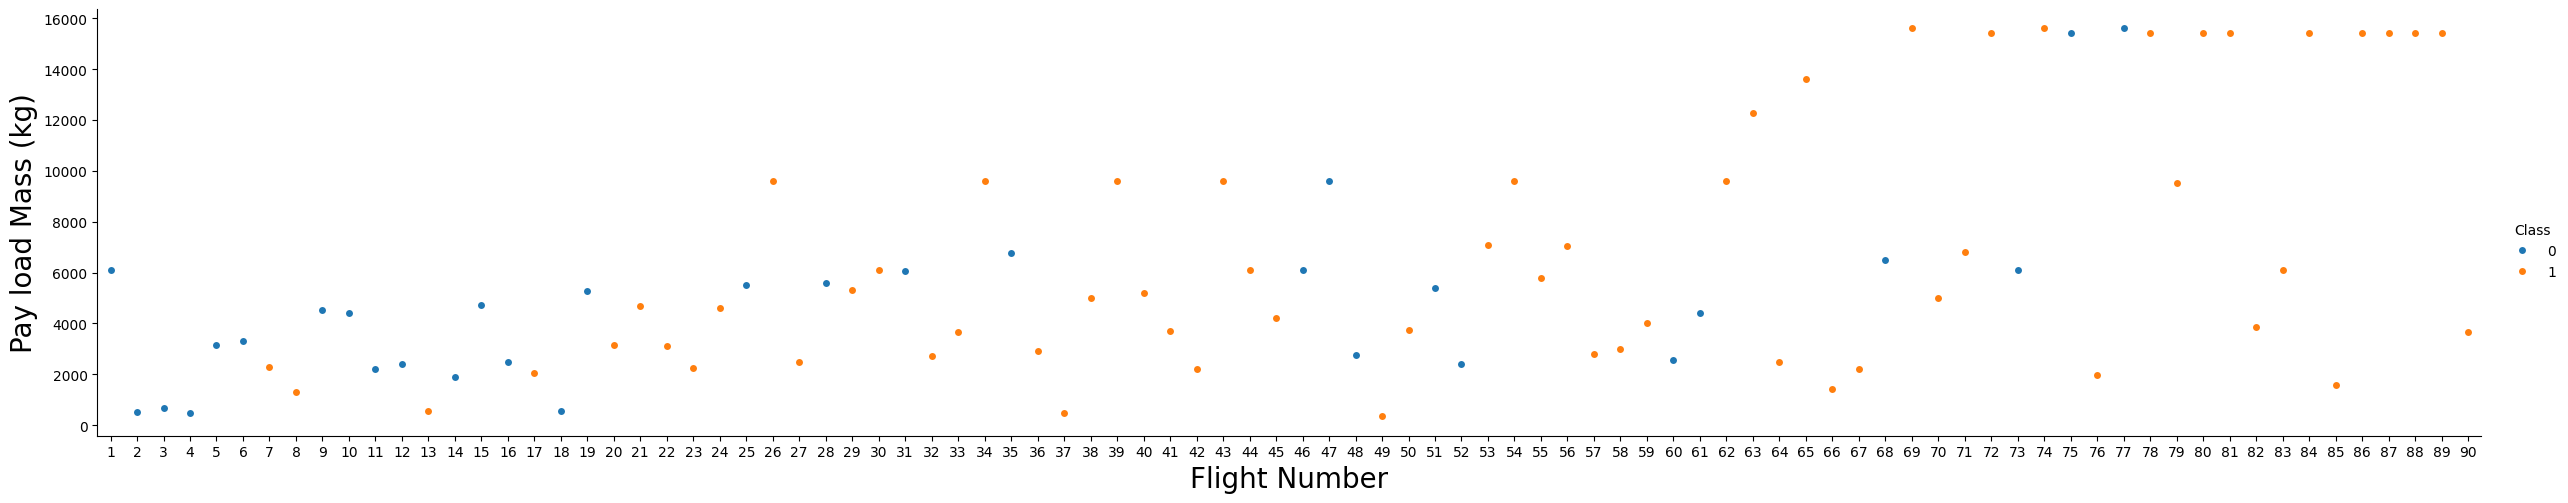

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

* We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.
* We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

### 3.2 <code>FlightNumber</code> vs <code>LaunchSite</code> (by Class)


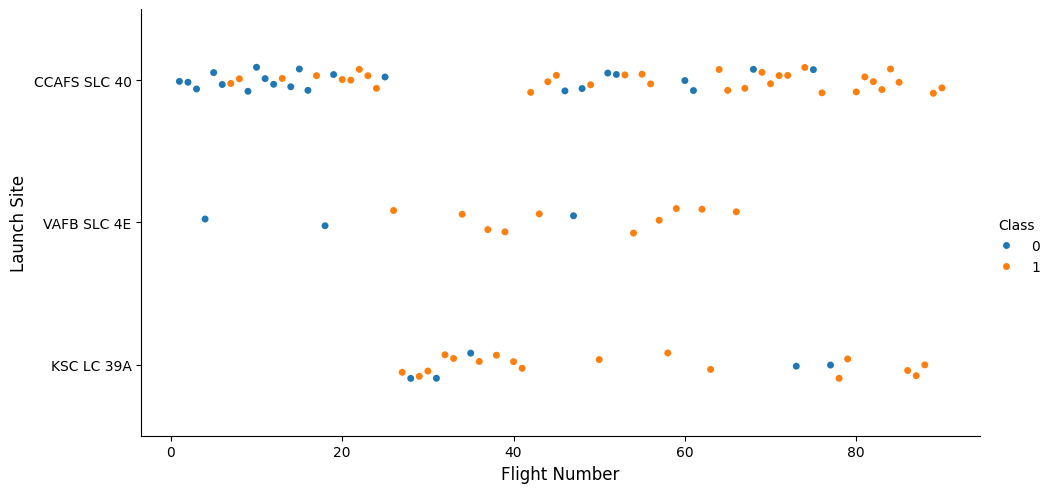

In [4]:
sns.catplot(x='FlightNumber',y='LaunchSite',hue='Class',data=df,aspect=2)
plt.xlabel("Flight Number",fontsize=12)
plt.ylabel("Launch Site",fontsize=12)
plt.show()

### 3.2 <code>PayloadMass</code> vs <code>LaunchSite</code> (by Class)

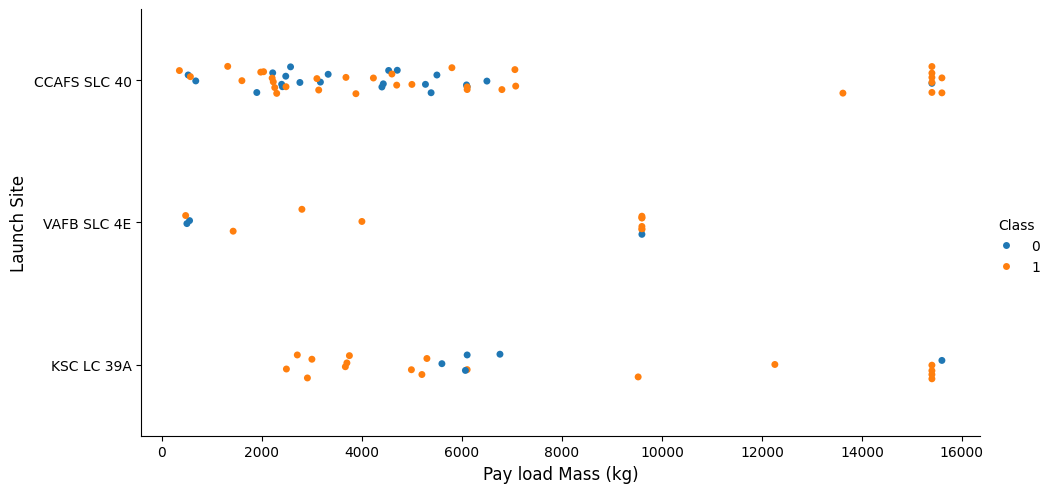

In [5]:
sns.catplot(x='PayloadMass',y='LaunchSite',hue='Class',data=df,aspect=2)
plt.xlabel("Pay load Mass (kg)",fontsize=12)
plt.ylabel("Launch Site",fontsize=12)
plt.show()

There are no rockets launched for heavypayload mass(greater than 10000) in the <code>VAFB SLC 4E</code> launchsite.


### 3.4 <code>Success Rate</code> by <code>Orbit</code>

C:\Users\aleje\AppData\Local\Temp\ipykernel_14448\1529539753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit',y='Class',data=data,palette=sns.color_palette("husl", 11))


<function matplotlib.pyplot.show(close=None, block=None)>

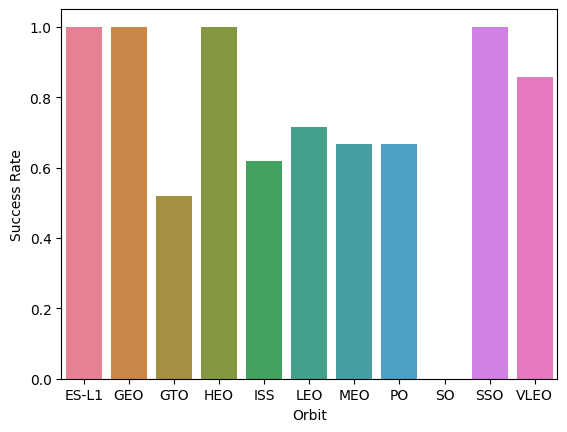

In [6]:
data = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(x='Orbit',y='Class',data=data,palette=sns.color_palette("husl", 11))
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.show

### 3.5 <code>FlightNumber</code> vs <code>Orbit</code> (by Class)

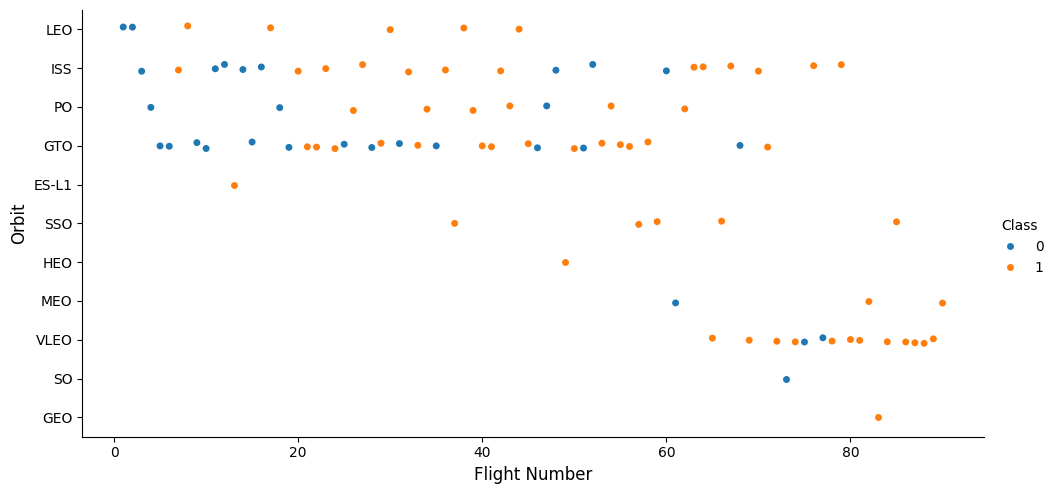

In [7]:
sns.catplot(x='FlightNumber',y='Orbit',hue='Class',data=df,aspect=2)
plt.xlabel("Flight Number",fontsize=12)
plt.ylabel("Orbit",fontsize=12)
plt.show()

* In the LEO orbit the Success appears related to the number of flights. 
* There seems to be no relationship between flight number and the GTO orbit.


### 3.6 <code>PayloadMass</code> vs <code>Orbit</code> (by Class)

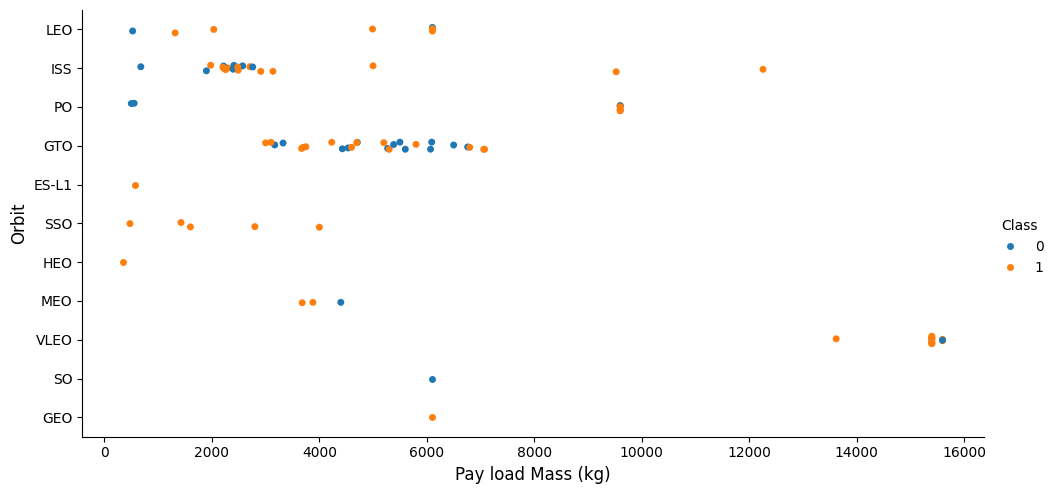

In [8]:
sns.catplot(x='PayloadMass',y='Orbit',hue='Class',data=df,aspect=2)
plt.xlabel("Pay load Mass (kg)",fontsize=12)
plt.ylabel("Orbit",fontsize=12)
plt.show()

* With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.
* For GTO we cannot distinguish the relationship well as both positive landing rate and negative landing (unsuccessful mission) are both there here.


## 4) Year extraction and annual success rate

Extract the year component from the `Date` field, replace `Date` with the year, compute annual success rate (`Class` mean) and plot it as a line chart.

In [9]:
# Function to Extract years from the date 
year=[]

def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


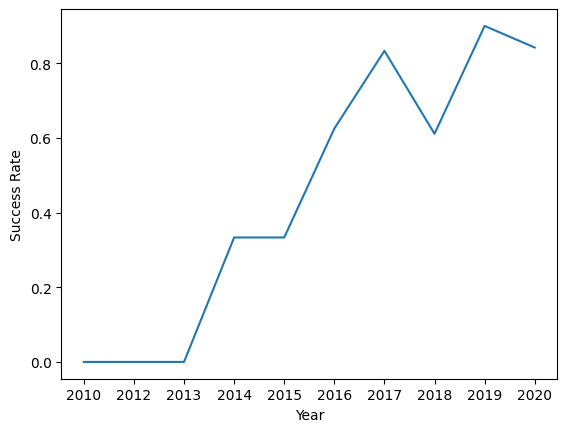

In [10]:
data = df.groupby('Date')['Class'].mean().reset_index()
sns.lineplot(x='Date',y='Class',data=data)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

The sucess rate since 2013 kept increasing until 2020.


## 5) Feature selection and one-hot encoding

Select features relevant for modeling and create dummy variables (one-hot encoding) for categorical columns (`Orbit`, `LaunchSite`, `LandingPad`, `Serial`).

In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [12]:
features_one_hot = pd.get_dummies(data=features,columns=['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


## 6) Casting numeric columns and export

Cast numeric columns to `float64` where necessary and export the final feature table to CSV (`dataset_part_3.csv`).

In [13]:
features_one_hot = features_one_hot.astype("float64")

In [14]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## 7) Notes & reproducibility

- The notebook loads data from a public URL — for offline runs, download `dataset_part_2.csv` and update the path.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
